In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
#Making useful functions for later use
def showDistances(G):
    dict = {0 : "Marine Drive", 1 :	"IIT Bhilai", 2 : "Airport", 3 : "NIT Raipur", 4 : "IIIT Naya Raipur", 5 : "AIIMS Raipur",
            6 : "Magneto Mall", 7 : "Ambuja Mall", 8 : "Shankaracharya College", 9 : "Jaistamvh Chowk", 10 : "Phool Chowk",
            11 : "Energy Park", 12 : "Budha Talab", 13 : "Wonderland Park", 14 : "Anna Punjabi", 15 : "Mahadev Ghat",
            16 : "Rebounce", 17 : "Chingra Waterfall", 18 : "Mayfair Resort", 19 : "Chhattisgarh Club"}

    for i,j in G.edges:
        print(dict[i],"<->",dict[j]," :",G.edges[i,j]["cost"])

def printOptimumPath(tour : list):
    dict = {0 : "Marine Drive", 1 :	"IIT Bhilai", 2 : "Airport", 3 : "NIT Raipur", 4 : "IIIT Naya Raipur", 5 : "AIIMS Raipur",
            6 : "Magneto Mall", 7 : "Ambuja Mall", 8 : "Shankaracharya College", 9 : "Jaistamvh Chowk", 10 : "Phool Chowk",
            11 : "Energy Park", 12 : "Budha Talab", 13 : "Wonderland Park", 14 : "Anna Punjabi", 15 : "Mahadev Ghat",
            16 : "Rebounce", 17 : "Chingra Waterfall", 18 : "Mayfair Resort", 19 : "Chhattisgarh Club"}

    for i in range(len(tour)):
        if i == len(tour)-1:
                print(dict[tour[i]])
        else:
                print(dict[tour[i]], "->",end = " ")

def printOptimumCost(G, tour_edges : list):
        sum = 0
        for i,j in tour_edges:
                sum += G.edges[i,j]["cost"]
        return sum 

In [3]:
n = 20  #Total number of locations to visit
G = nx.complete_graph(n)    #Making fully connected graph with n locations

In [4]:
#Geographical coordinates of the locations - For visualisation purpose only
my_pos = {0 : (518,686), 1 : (514,589), 2 : (610,617), 3 : (451,698), 4 : (640, 545), 5 : (420, 708), 6 : (543,687), 
          7 : (548,731), 8 : (99,663), 9 : (482,691), 10 : (485,695), 11 : (559,659), 12 : (484,676), 13 : (418,678), 
          14 : (504,662), 15 : (445,675), 16 : (557,685), 17 : (932,16), 18 : (643,575), 19 : (506,686)}

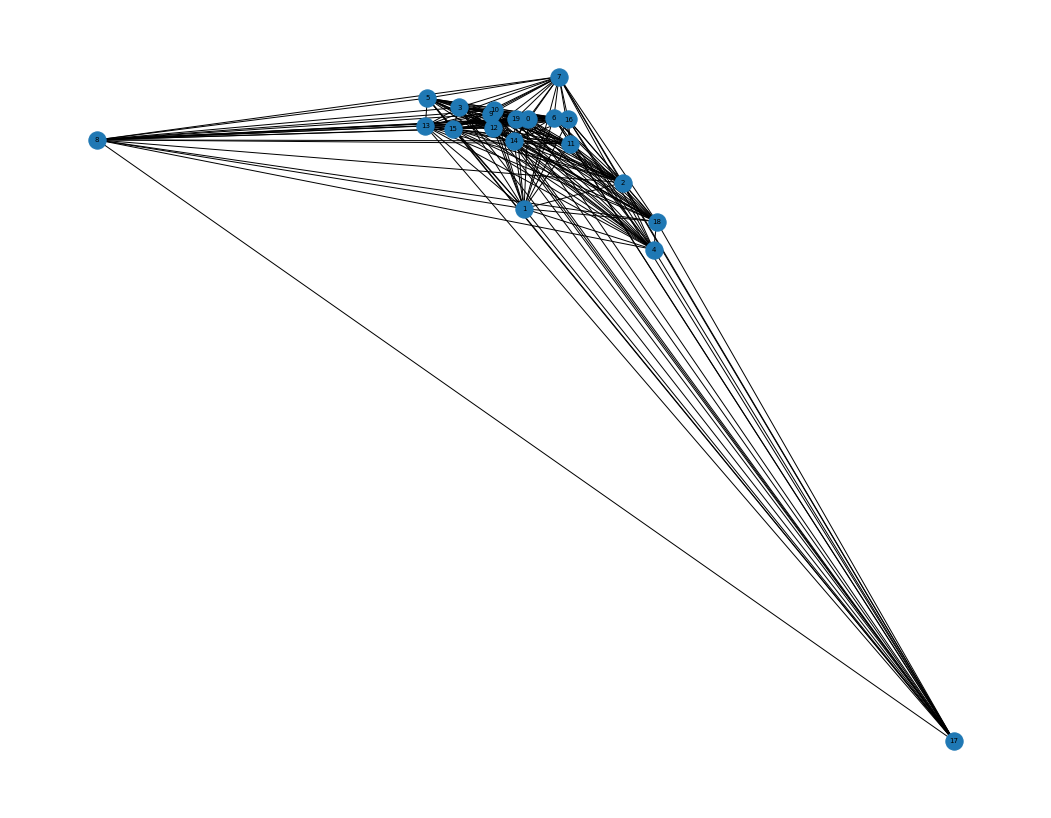

In [5]:
#Drawing the fully connected graph
plt.figure(1, figsize = (1.2*12,1.2*9.30376))
nx.draw(G, pos = my_pos,with_labels = True, node_size = 300, font_size = 7)

In [6]:
#Importing cost of travelling between all different locations as an CSV file (Format of the CSV file is important)
costs = pd.read_csv("Case_Study_Data.csv", index_col=["Index"]).T.fillna("~")
costs

Index,Marine Drive,IIT Bhilai,Airport,NIT Raipur,IIIT Naya Raipur,AIIMS Raipur,Magneto Mall,Ambuja Mall,Shankaracharya College,Jaistambh Chowk,Phool Chowk,Energy Park,Budha Talab,Wonderland Park,Anna Punjabi,Mahadev Ghat,Rebounce,Chingra Waterfall,Mayfair Resort,Chhattisgarh Club
Marine Drive,~,211.0,236.0,128.0,788.0,175.0,70.0,113.0,633.0,65.0,70.0,140.0,73.0,232.0,79.0,207.0,91.0,1810.0,734.0,39.0
IIT Bhilai,~,~,192.0,246.0,726.0,286.0,232.0,323.0,438.0,226.0,177.0,190.0,167.0,260.0,160.0,235.0,225.0,1757.0,670.0,193.0
Airport,~,~,~,377.0,617.0,417.0,185.0,294.0,780.0,267.0,272.0,142.0,275.0,391.0,390.0,365.0,177.0,1725.0,528.0,240.0
NIT Raipur,~,~,~,~,987.0,76.0,224.0,198.0,709.0,90.0,80.0,271.0,90.0,131.0,171.0,106.0,244.0,1963.0,931.0,118.0
IIIT Naya Raipur,~,~,~,~,~,286.0,232.0,1123.0,856.0,853.0,853.0,788.0,885.0,1097.0,706.0,983.0,790.0,1445.0,100.0,788.0
AIIMS Raipur,~,~,~,~,~,~,287.0,257.0,843.0,150.0,141.0,335.0,149.0,129.0,235.0,172.0,308.0,2039.0,1061.0,168.0
Magneto Mall,~,~,~,~,~,~,~,145.0,695.0,150.0,155.0,152.0,158.0,288.0,135.0,262.0,46.0,1875.0,752.0,125.0
Ambuja Mall,~,~,~,~,~,~,~,~,870.0,139.0,144.0,202.0,157.0,327.0,175.0,302.0,165.0,2044.0,1150.0,181.0
Shankaracharya College,~,~,~,~,~,~,~,~,~,579.0,579.0,705.0,570.0,826.0,497.0,677.0,667.0,1976.0,700.0,621.0
Jaistambh Chowk,~,~,~,~,~,~,~,~,~,~,39.0,169.0,43.0,146.0,83.0,120.0,127.0,1892.0,797.0,65.0


In [7]:
#Adding costs to the graph network
for i,j in G.edges:
    G.edges[i,j]['cost'] = costs.to_numpy()[i][j]

In [8]:
showDistances(G)

Marine Drive <-> IIT Bhilai  : 211.0
Marine Drive <-> Airport  : 236.0
Marine Drive <-> NIT Raipur  : 128.0
Marine Drive <-> IIIT Naya Raipur  : 788.0
Marine Drive <-> AIIMS Raipur  : 175.0
Marine Drive <-> Magneto Mall  : 70.0
Marine Drive <-> Ambuja Mall  : 113.0
Marine Drive <-> Shankaracharya College  : 633.0
Marine Drive <-> Jaistamvh Chowk  : 65.0
Marine Drive <-> Phool Chowk  : 70.0
Marine Drive <-> Energy Park  : 140.0
Marine Drive <-> Budha Talab  : 73.0
Marine Drive <-> Wonderland Park  : 232.0
Marine Drive <-> Anna Punjabi  : 79.0
Marine Drive <-> Mahadev Ghat  : 207.0
Marine Drive <-> Rebounce  : 91.0
Marine Drive <-> Chingra Waterfall  : 1810.0
Marine Drive <-> Mayfair Resort  : 734.0
Marine Drive <-> Chhattisgarh Club  : 39.0
IIT Bhilai <-> Airport  : 192.0
IIT Bhilai <-> NIT Raipur  : 246.0
IIT Bhilai <-> IIIT Naya Raipur  : 726.0
IIT Bhilai <-> AIIMS Raipur  : 286.0
IIT Bhilai <-> Magneto Mall  : 232.0
IIT Bhilai <-> Ambuja Mall  : 323.0
IIT Bhilai <-> Shankaracharya Co

In [9]:
temp_pos = nx.spring_layout(G)

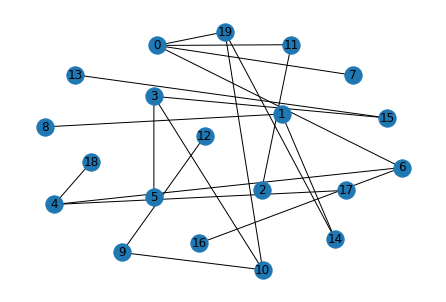

In [10]:
#Making minimum spanning tree of the graph network
T = nx.minimum_spanning_tree(G, weight='cost')
nx.draw(T, pos = temp_pos, with_labels = True)

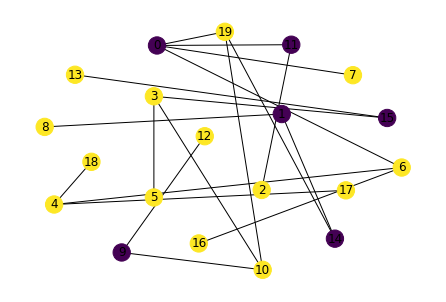

In [11]:
#Getting nodes of the minimum spanning tree which have odd degrees and showing them as different colors in the graph
odd_degree_nodes = [i for i in T.nodes if T.degree(i)%2 != 0]
color = [T.degree(i)%2 for i in T.nodes]
nx.draw(T, pos = temp_pos, node_color = color, with_labels = True)

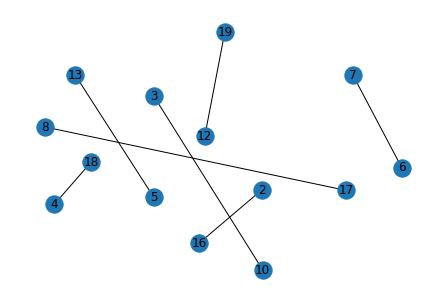

In [12]:
#Finding the minimum cost perfect matching of all the odd degree nodes
for i,j in G.edges:
    G.edges[i,j]["neg_cost"] = - G.edges[i,j]["cost"]

matching = nx.max_weight_matching(G.subgraph(odd_degree_nodes), maxcardinality = True, weight='neg_cost')
nx.draw(G.edge_subgraph(matching), pos = temp_pos, with_labels = True)

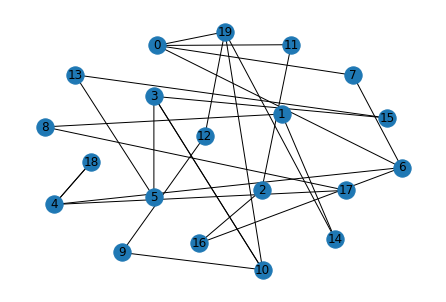

In [13]:
#Combining both the graphs to get one Eulerian graph
M = nx.MultiGraph()

M.add_nodes_from(range(n))

M.add_edges_from(T.edges())
M.add_edges_from(matching)

nx.draw(M, pos = temp_pos, with_labels = True)

In [22]:
s = 2

#Finding Eulerian cycle of the multigraph
initial_tour = list(nx.eulerian_circuit(M, source = s))

#Remove repeated nodes from the graph
tour = [s]

for (i,j) in initial_tour:
    if j not in tour:
        tour.append(j)
tour.append(s)

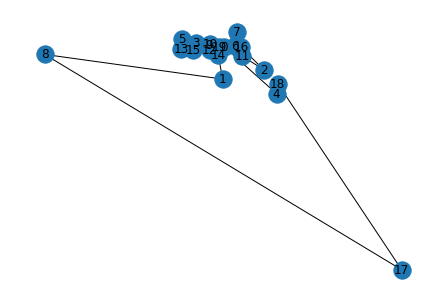

In [23]:
#Drawing the optimum tour
tour_edges = [(tour[i], tour[i+1]) for i in range(n)]
nx.draw(G.edge_subgraph(tour_edges), pos = my_pos, with_labels = True)

In [24]:
#Optimum path to take
printOptimumPath(tour)

Airport -> Rebounce -> Magneto Mall -> Ambuja Mall -> Marine Drive -> IIIT Naya Raipur -> Mayfair Resort -> Chingra Waterfall -> Shankaracharya College -> IIT Bhilai -> Anna Punjabi -> Chhattisgarh Club -> Budha Talab -> Jaistamvh Chowk -> Phool Chowk -> NIT Raipur -> Mahadev Ghat -> Wonderland Park -> AIIMS Raipur -> Energy Park -> Airport


In [25]:
#Cost for the optimum path
printOptimumCost(G, tour_edges)

6587.0